In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [3]:
from pandas.plotting import scatter_matrix

In [4]:
sns.set_style('whitegrid')

In [5]:
df= pd.read_excel('종로구 실거래 최종변수.xlsx', index_col=0)

# object를  숫자형으로

In [6]:
df['price'] = df.price.str.replace(',','').astype('int64')

In [7]:
df['E_GDP'] = df.E_GDP.str.replace(',','').astype('int64')

In [8]:
df['E_rate'] = df.E_rate.str.replace(',','').astype('float64')

In [9]:
apt_df = df[['price','C_year','year','month','day','size','floor','brand']]
dis_df = df[['price','D_hsch','D_msch','D_esch','D_sub','D_trans']]
eco_df = df[['price','E_GDP','E_grow','E_CPI','E_rent','E_rate']]

# 가격과의 상관관계 

In [10]:
corr_matrix = df.corr()

## 양의 상관관계
- C_year 0.258279
- year 0.149397
- day 0.029881
- size 0.884707
- lng        0.169126
- E_CPI      0.083022
- brand      0.159276

## 음의 상관관계 
- month     -0.003110
- floor     -0.024488
- lat       -0.084612
- D_hsch    -0.255806
- D_msch    -0.229329
- D_esch    -0.271739
- D_sub     -0.103739
- D_trans   -0.256309
- E_grow    -0.089026
- E_rent    -0.147463

# apt_df (가격, 건축년도, 거래년도, 거래월 ,거래일,평수,층,브랜드) 분석 

## 가격, 사이즈, 층 

C:\Users\Itshony\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


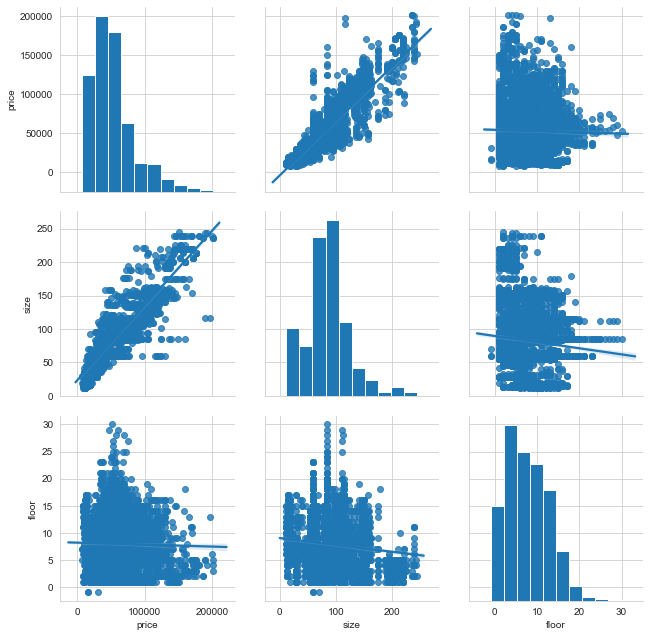

In [59]:
sns.pairplot(apt_df, vars=['price','size','floor'], kind='reg',size=3)

 ## 평수와 가격과의 관계 
- 평수와 가격과의 양의 상관관계가 매우 높다.
- 하지만 100이하의 사이즈임에도 15억정도의 가격이 책정된 매물이 있음 -> 이를 이상치로 봐야할지 어찌해야 할지 모르겠음 !

## 층과 가격과의 관계
- 5억대 가격대를 형성하는 것들의 층수 범위가 가장 넓다.  
- 15억 이상의 가격대를 형성하는 것들의 대부분은 5층 이하이다. 
- 15층 이상이 되면 가격이 확 감소하는 형태를 띈다. (거래 자체가 없다고 볼 수 있다) 

## 층과 평수와의 관계
- 사이즈가 50~110/120일 때의 층수가 가장 다양하다.
- 사이즈가 100 후반대로 가면 층수가 낮아진다.  

## 가격, 브랜드

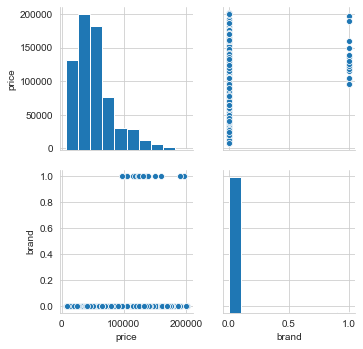

In [60]:
sns.pairplot(apt_df, vars=['price','brand'])

- 8대 브랜드 안에 속하지 않을 경우, 가격 분포는 다양하게 나타난다. 
- 8대 브랜드 안에 속할 경우, 10억 이상의 가격을 보인다. 

## 년 별 거래 건수

(array([528.,   0., 686.,   0., 840.,   0., 823.,   0., 814., 720.]),
 array([2013. , 2013.5, 2014. , 2014.5, 2015. , 2015.5, 2016. , 2016.5,
        2017. , 2017.5, 2018. ]),
 <a list of 10 Patch objects>)

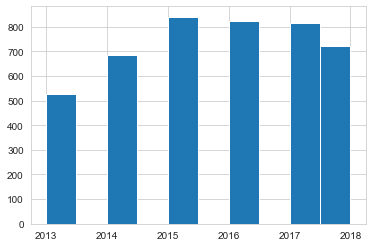

In [68]:
plt.hist(df['year'])

- 2015년까지는 거래량이 급하게 증가했다가 2017년까지는 아주 완만히 감소. 
- 2017년에서 2018년으로 넘어갈 때 거래량 급하게 감소. 

## 월별 거래 건수

(array([707., 447., 318., 387., 379., 374., 411., 405., 363., 620.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

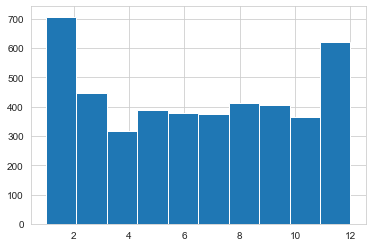

In [66]:
plt.hist(df['month'])

- 1월과 12월의 거래 건수가 많음

## 일별 거래 건수

(array([402., 399., 419., 435., 431., 423., 456., 489., 449., 508.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

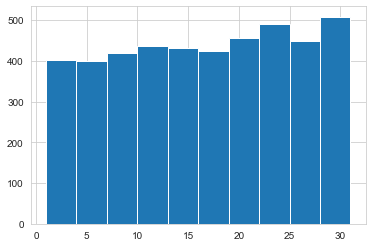

In [67]:
plt.hist(df['day'])

- 월초보다는 월 말이 거래량이 조금 더 많음. 월의 말로 갈수록 조금 증가. 

## apt_df 중 price 를 제외한 다른 변수들의 관계

C:\Users\Itshony\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


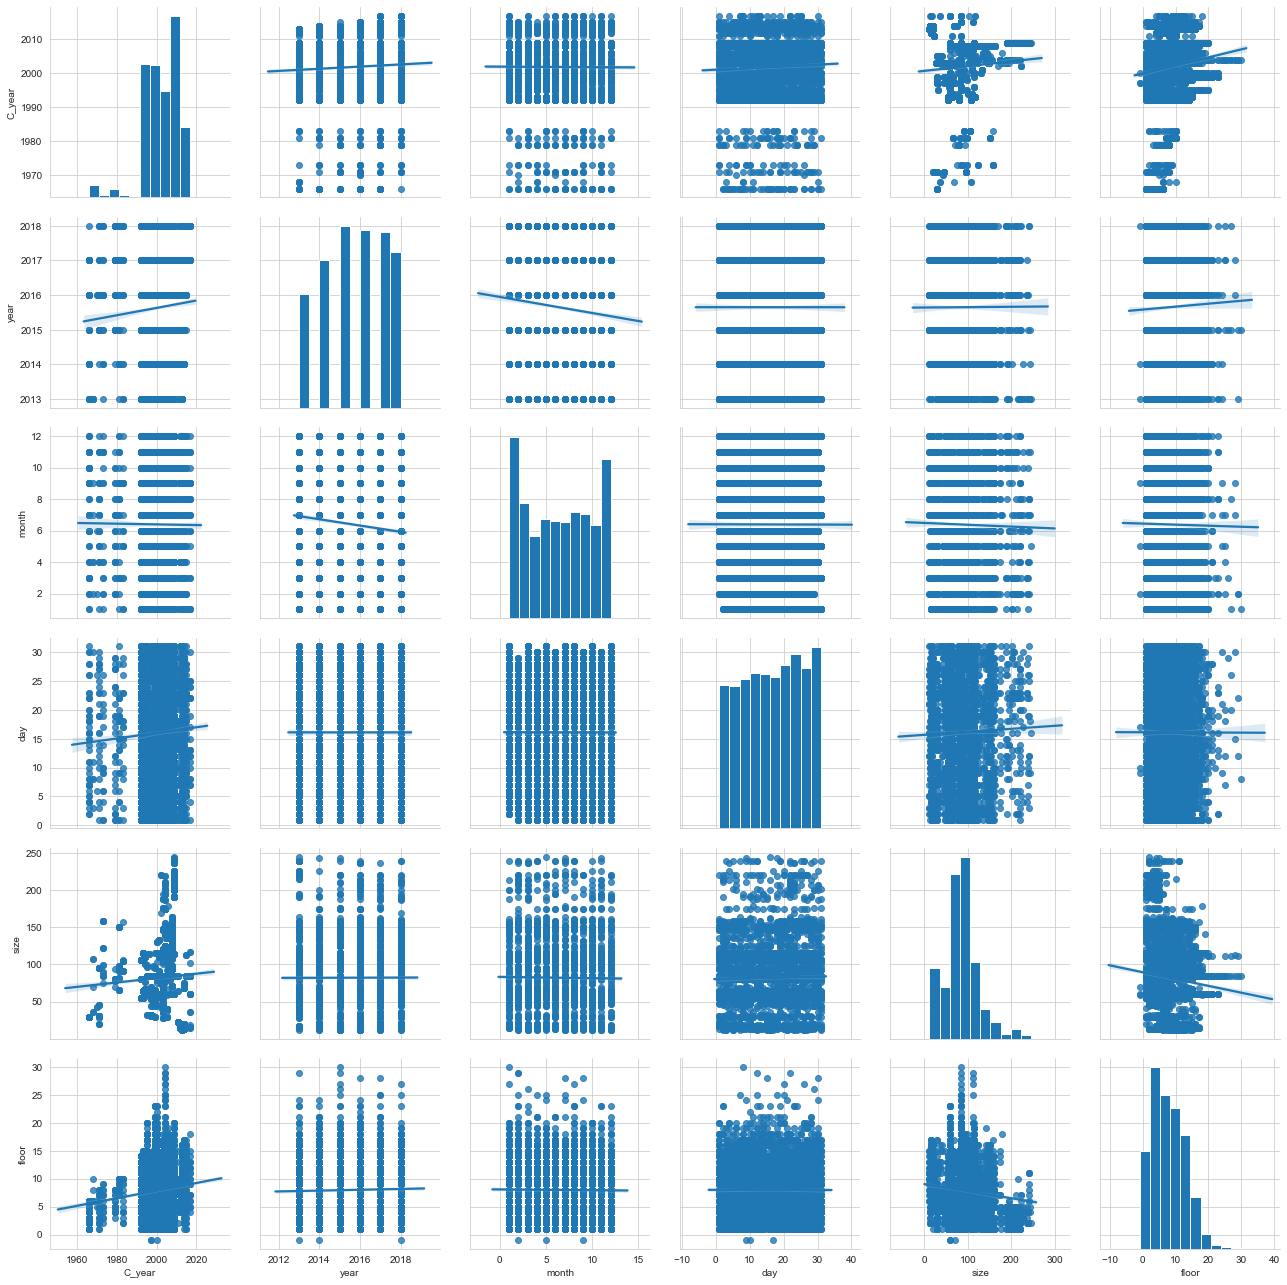

In [19]:
sns.pairplot(apt_df,vars=['C_year','year','month','day','size','floor'], kind='reg',size=3)

### 건축 년과 층
- 건축일이 현재와 가까워질수록 층수가 높아진다. (2000년대 초반에 는 극도로 증가했다가 현재는 15층~20층 정도로 감소)

### 건축 년과 사이즈 
- 2000년대 초반 큰 사이즈의 아파트 건축이 많이 되었지만, 이후로는 100 정도로 감소 추세

### 건축 년과 거래년도
- 건축년도가 현재와 가까운 아파트일수록 거래량도 많다. 

# dis_df (가격,고등학교 수,중학교 수, 초등학교 수,환승역, 역) 분석

## 환승역, 역, 고등학교 수, 중학교 수, 초등학교 수와 가격

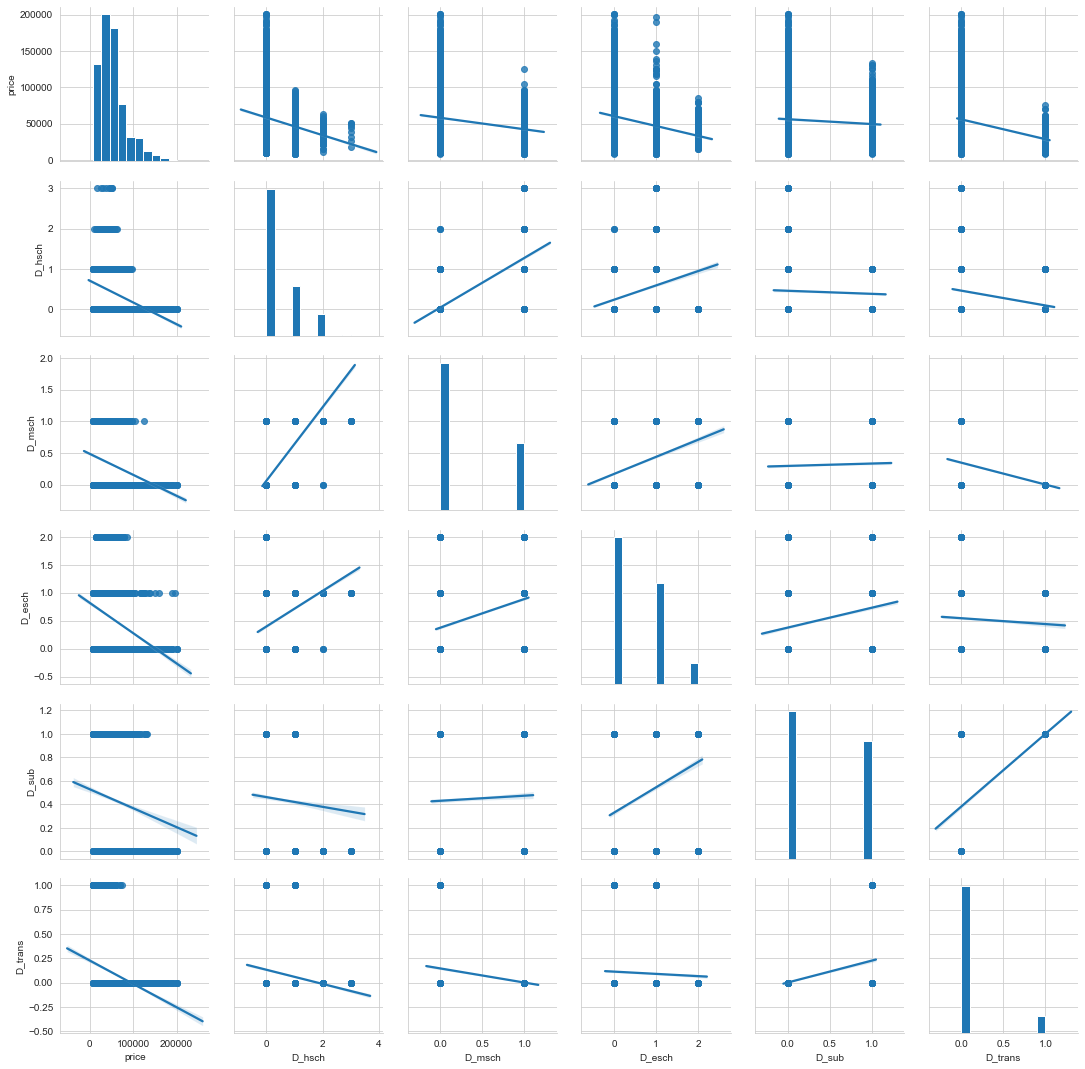

In [75]:
sns.pairplot(dis_df,vars = ['price','D_hsch','D_msch','D_esch','D_sub','D_trans'],kind='reg')

### 역과 가격
- 300m내에 환승역이 있을 경우, 10억 아래의 분포를 보임
- 300m내에 역이 있을 경우, 13억 보다 아래에 값이 존재

### 학교와 가격
- 300m내에 초등학교가 있는 경우, 2개 있을 경우 10억 아래이지만, 1개 있을 경우 최대 20억까지 나가는 경우가 있다. 
- 300m내에 중학교가 있는 경우, 이때는 1개일 경우밖에 없으며, 10억 아래의 값들이 존재.
- 300m내에 고등학교가 1개, 2개, 3개 있을 경우 모두 10억 아래에 값이 존재하고, 고등학교 수가 많아질수록 값의 분포도 줄어든다. 
- 300m내에 있는 역과 환승역의 상관관계가 높다. 
- 300m내에 있는 고등학교와 중학교의 상관관계가 높다. 
- 300m내에 있는 고등학교와 초등학교의 상관관계가 높다. 
- 300m내에 있는 초등학교와 중학교의 상관관계가 높다. 

### 제안
* 역과 환승역을 합쳐도 좋을 것 같다. 
* 고등학교, 중학교, 초등학교를 합쳐도 좋을 것 같다. 
* 역/환승역과 아파트 사이의 거리의 범위를 좀 더 늘리면 의미있는 결과가 나오지 않을까 싶다. 
* 현재는 역/환승역이 300m내에 있을 경우 아파트의 가격이 증가하는 양상을 보이는데, 이는.. 없는 경우의 아파트 수 자체가 많기 때문이기도 하지 않을까. 하는 생각 보통 500m를 5분 정도 걸린다고 생각하면 역과의 거리가 300m내에 아파트가 있을 가능성이.. 높은가? 하는 의문

# eco_df (가격,국내총생산,경제성장률,소비자물가,집세,일별평균환율) 분석

## 변수설명 
- E_GDP: 분기별 국내 총생산
- E_grow: 분기별 경제 성장률
- E_CPI: 매월 소비자물가 (예 : 08년 7월 전월비 0.7% 상승은 08.7월 소비자물가지수가 08.6월 대비 0.7% 상승한 것을 나타냄)
- E_rent: 매월 집세
- E_rate: 일별평균환율

## 실거래가, 년, 경제성장률, 국내총생산

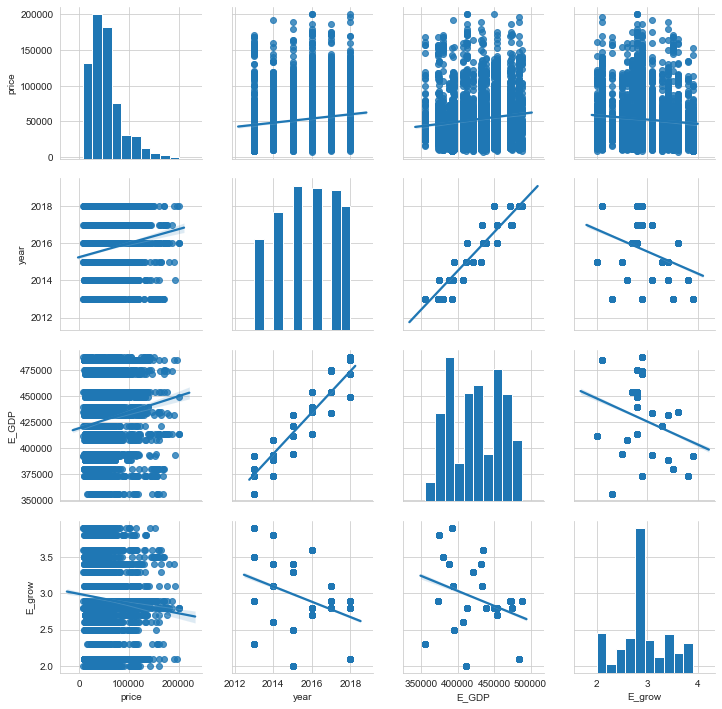

In [27]:
sns.pairplot(df, vars=['price','year','E_GDP','E_grow'], kind='reg')

### 국내총생산 
- year(거래년도)과 E_GDP(국내총생산) 은 강한 양의 상관관계를 보인다. = 년도가 갈수록 국내총생산은 늘어난다. 
- price(실거래가)와 E_GDP는 약한 양의 상관관계를 보인다 =  국내총생산량이 높을 때에 거래되는 실거래가도 높다. 
- 해가 지날수록, 국내 총생산이 증가하고, 실거래가도 증가한다. = 증가한 가격에 거래되는 때에, 국내총생산량도 높다.

### 경제성장률
- year(거래년도)과 E_grow 는 음의 상관관계.
- 즉 해가 지나갈수록 경제 성장률이 감소된다. 고 볼 수 있지만, 많이 흩어져 있다.
- price 와 E_grow 는 약한 음의 상관관계가 있다. 
- 상대적으로 높은 실거래가로 거래된 때의 경제 성장률은 상대적으로 감소하는 경향. 

### 경제성장률과 국내총생산 
- E_GDP(국내총생산)와 E_grow(경제성장률)은 음의 상관관계를 띈다. 
- 국내 총 생산이 증가한 때의 경제성장률은 감소한다. 

## 실거래가, 년, 분기별 소비자물가, 분기별 집세, 일별평균환율

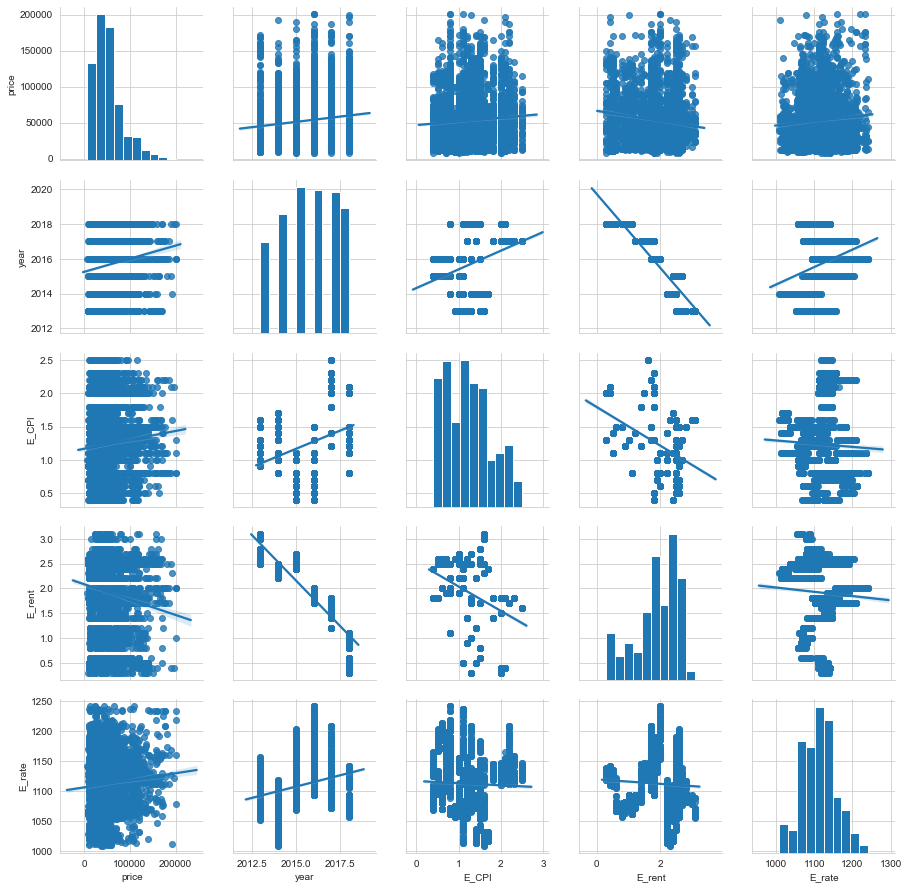

In [26]:
sns.pairplot(df, vars=['price','year','E_CPI','E_rent','E_rate'], kind='reg')

### 년도에 따른 거시경제 변화
- E_rate(일별평균환율) : 약한 양의 상관관계로 보이긴 하지만, 2014년에는 감소하고 2016년에는 증가하는 곡선형. 
- E_rent(집세증가율): 강한 음의 상관관계 마이너스 성장인 경우는 없지만,증가율이 줄고 있다(하지만 이 집세는 전체 가구 대상의 지표)
- E_CPI(소비자물가): 양의 상관관계. 2014년에는 증가하고, 다시 감소했다가 2017년에는 갑자기 증가하는 곡선형.  

### 가격에 따른 거시경제 변화
- 1100에서 1150 사이의 환율을 가질 때, 가장 거래가 많음. 그 사이의 값에서는 약한 양의 상관관계 (1100에서 1150 사이의 환율일 때의 경우가 많기 때문이라고 생각) 
- 1150원 1250원 사이의 환율을 가질 때, 낮은 가격의 거래는 줄고 상대적으로 높은 가격의 거래는 오히려 더 많음. (10억 이상)
- 집세 물가가 1.5 에서 2 초반의 성장률을 보일 때, 거래가 가장 많음. 음의 상관관계. 성장률이 증가할 수록 가격은 내려간다.(집세 자체가 전국을 대상으로 한 값이고 증가율을 나타내는 값이기 때문에 전국의 집값 성장세는 둔하다 정도로 해석 가능/ 의미있는 변수일까? 하는 의문) 
- 소비자 물가가 1.0에서 1.5 사이의 값일 경우, 양의 상관관계. 소비자 물가 성장률이 증가할수록 가격도 올라간다. 

## price 를 제외한 거시경제 변수 분석

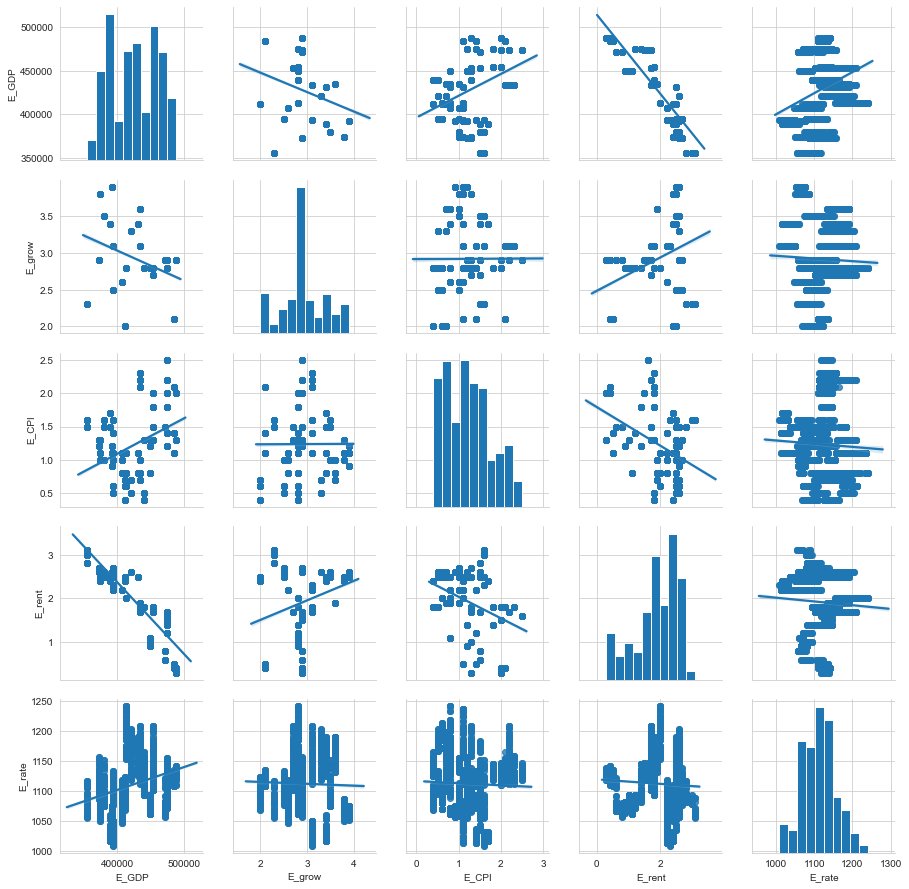

In [13]:
sns.pairplot(df, vars=['E_GDP','E_grow','E_CPI','E_rent','E_rate'], kind='reg')

### 거시경제 변수 끼리의 상관관계

### 양의 상관관계
- E_GDP(국내 총생산)과 E_rate(일별평균환율) : 환율이 1075에서 1150 사이일 떄는 양의 상관관계
- E_GDP(국내 총생산)과 E_CPI(소비자물가) 는 약한 상관관계. 분포?가 너무 커서 흐음 .. 상관관계가 있다고 설명해도 좋을지 모르겠다.  
- 국내 총생산이 증가할수록 소비자 물가도 증가. (물가가 증가해도 그만한 돈을 지불할 능력이 있기 때문이라고 해석)

### 음의 상관관계 
- 국내 총생산과 E_rent(집세증감률)은 강한 음의 상관관계. 국내 총생산이 줄면 집세가 증가. 국내 총생산이 늘면 집세 감소
- 국내 총생산과 E_grow(경제성장률)은 경제성장률이 2.5에서 3.25 사이일 때의 음의 상관관계. 국내 총생산이 늘면 경제성장률은 감소

# 정리

## 아파트 관련 변수
- 사이즈가 클수록 실거래가도 증가
- 15억 이상의 가격대를 형성하는 것들은 층수가 5층 이하인 경우가 많음
- 2000년 초반에 지은 건물들은 30층까지 지은 건물들이 많지만 그 이후로는 15층 정도의 크기는 100 정도의 아파트를 많이 짓고 있다. 
- 8대 브랜드일 경우, 10억 이상의 가격대를 형성 

## 거리 변수


## 거시경제 변수
- 국내 총생산이 늘 때 환율도 올라간다. 
- 국내 총생산이 증가할 때 소비자 물가도 올라간다. 
- 집세 증가율은 국내 총생산이 증가할 때 증가량이 감소
- 국내 총생산이 늘어도 경제 성장률은 감소
- 해가 지날수록 환율은 곡선을 그리며 변동한다. 
- 해가 지날수록 집세는 감소 추세
- 해가 지날수록 소비자물가는 증가 추세
- 해가 지날수록 국내총생산은 증가
- 해가 지날수록 실거래가도 중가
- 해가 지날수록 경제성장률은 감소